# Assignment 2: Data (Pre)processing and Simple Plotting

Gruppe Dangerous Memory: Jake, Christian, Alexander

## Tasks

#### 1.Read the entire dataset of Danish housing sales data, from Boliga, into a Pandas DataFrame. Use the read_csv function from the pandas module.

Using a few helper functions, download the zip file containing the boliga data, unzip the file containing the multiple CSV files and combine them. Finally read the combines CSV file into a pandas dataframe.

In [1]:
import requests
import os.path
import sys
import zipfile
import glob
import pandas as pd

boliga_stats_url = "https://raw.github.com/datsoftlyngby/soft2019fall-bi-teaching-material/master/week36/assignment_2/boliga_stats.zip"
boliga_filename = "boliga_stats.zip"
boliga_extraction_folder = "boliga_stats"


def download_as_file(URL, file_name):
    '''Download file from given URL and save to file_name from parameters, if already exists, do nothing..'''

    if not os.path.isfile(file_name):

        try:
            print(f'Downloading {boliga_filename} from {boliga_stats_url}...')
            response = requests.get(URL)

            with open(file_name, 'wb') as the_file:
                the_file.write(response.content)

        except Exception as e:
            print(f'Error downloading {boliga_filename}; ', e)
            sys.exit(1)
        print(f'{boliga_filename} downloaded.')
    else:
        print(f'{boliga_filename} already downloaded')


def unzip_file(file_to_unzip, extraction_folder):
    '''unzip given zipfile to given extraction folder, if given folder is empty'''
    if not os.path.exists(extraction_folder):
        os.makedirs(extraction_folder)
    if len(os.listdir(boliga_extraction_folder)) == 0:
        print(f'Extracting {boliga_filename} into folder {boliga_extraction_folder}.')
        with zipfile.ZipFile(file_to_unzip, 'r') as zip_ref:
            zip_ref.extractall(extraction_folder)
    else: 
        print(f'{boliga_filename} already extracted.')


def combine_all_csv():
    '''
    Combine multiple CSV files
    https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
    '''
    print(f'Combining all csv files into boliga_all.csv ...')
    os.chdir(boliga_extraction_folder)
    all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
    #combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    os.chdir('..')
    #export to csv
    combined_csv.to_csv( "boliga_all.csv", index=False, encoding='utf-8-sig')
    print("Done!")

download_as_file(boliga_stats_url, boliga_filename)
unzip_file(boliga_filename, boliga_extraction_folder)
combine_all_csv()

df = pd.read_csv('boliga_all.csv')

boliga_stats.zip downloaded.
Extracting boliga_stats.zip into folder boliga_stats.
Combining all csv files into boliga_all.csv ...
Done!


Cleanup of the multiple CSV files & zip file:

In [2]:
%%bash
rm -r "boliga_stats"
rm "boliga_stats.zip"
echo done cleaning up

done cleaning up


#### 2. Geocode the the entire dataset of Danish housing sales data. Add two new columns to the DataFrame, one for latitude (lat) and one for longitude (lon) coordinates per address. Do the geocoding with help of the OSM dataset stored in a file as discussed in class. Save that DataFrame to a CSV file with the help of pandas'

Remove null (NaN) values from the dataset:

In [3]:
df_data = df[(~df['address'].isnull()) & (~df['zip_code'].isnull())]

We have decided to use the JSON file provided here: (https://github.com/datsoftlyngby/soft2019fall-bi-teaching-material/blob/master/week36/assignment_2/postcodes.zip) with pd.read_json we put the data in a dataframe

In [4]:
df_osm = pd.read_json('../../../soft2019fall-bi-teaching-material/week36/assignment_2/postcodes/postcodes.json', orient='index')

We then define a method we will use to process the df_osm dataframe.

We are using a try except block because there is around 20k addresses in df_data that doesn't follow the normal rules.

In [5]:
def lambdaFunction(address, zip_code):
    try:
        address_no_side = address.split(',')[0]
        split_address = address_no_side.split(' ')
        split_zip_code = zip_code.split(' ')
        street = " ".join(split_address[:-1])
        house_number = split_address[-1]
        zip_code_number = split_zip_code[0]
        df_osm_lat_lon = df_osm.loc[zip_code_number].loc[street][house_number]
        return df_osm_lat_lon
    except:
        t=0

We then add lon and lat to df_data using a lambda expression to execute a method on each row in the dataframe.

In [6]:
from tqdm import tqdm
tqdm.pandas(desc="Adding lon and lat")

df_data[['lon', 'lat']] = df_data.progress_apply(lambda x : pd.Series(lambdaFunction(x['address'], x['zip_code'])), axis=1)
        
df_data.to_csv(r'osm_export.csv')

Adding lon and lat: 100%|██████████| 1385309/1385309 [27:46<00:00, 831.49it/s] 


#### 3. Convert all sales dates in the dataset into proper datetime objects, see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html.

In [7]:
df_data['sell_date'] = pd.to_datetime(df_data['sell_date'], dayfirst = True)
df_data['sell_date']

0         2017-05-08
1         2017-05-04
2         2017-05-02
3         2017-05-01
4         2017-04-06
5         2017-04-05
6         2017-03-28
7         2017-03-21
8         2017-03-09
9         2017-02-25
10        2017-02-24
11        2017-02-23
12        2017-02-10
13        2017-01-31
14        2017-01-26
15        2017-01-18
16        2017-01-18
17        2017-01-05
18        2017-01-03
19        2016-12-27
20        2016-12-22
21        2016-12-22
22        2016-12-20
23        2016-12-20
24        2016-12-13
25        2016-12-12
26        2016-12-12
27        2016-12-07
28        2016-11-25
29        2016-11-25
             ...    
1385279   1994-01-29
1385280   1994-01-13
1385281   1994-01-05
1385282   1993-11-11
1385283   1993-10-27
1385284   1993-10-26
1385285   1993-10-24
1385286   1993-10-09
1385287   1993-09-23
1385288   1993-09-08
1385289   1993-08-16
1385290   1993-06-25
1385291   1993-04-06
1385292   1993-03-10
1385293   1993-02-11
1385294   1993-01-04
1385295   199

#### 4. Compute the average price per square meter for the years 1992 and 2016 respectively for the city centers of Copenhagen (zip code 1050-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000). Create two new DataFrames, one for the year 1992 and one for the year 2016, which contain the respective zip codes and the average price per square meter corresponding to the aforementioned cities. Let the DataFrames be sorted by ascending prices.

In [8]:
zip_codes_for_df_mean = ['5000','8000','9000']
lst = range(1050,1499)
zip_codes_1050_1499 = ["{:01d}".format(x) for x in lst]
zip_codes_for_df_mean = zip_codes_1050_1499 + zip_codes_for_df_mean

df_1992 = df_data[(df_data['sell_date'].dt.year == 1992)].copy()
df_1992_mean = df_1992[(df_1992['zip_code'].str.startswith(tuple(zip_codes_for_df_mean)))].groupby('zip_code').mean().sort_values('price').copy()
df_2016 = df_data[(df_data['sell_date'].dt.year == 2016)].copy()
df_2016_mean = df_2016[(df_2016['zip_code'].str.startswith(tuple(zip_codes_for_df_mean)))].groupby('zip_code').mean().sort_values('price').copy()

In [15]:
from IPython.display import display, clear_output
display(df_1992_mean, df_2016_mean)

,price,price_per_sq_m,no_rooms,size_in_sq_m,year_of_construction,price_change_in_pct,lon,lat
zip_code,,,,,,,,
1304 København K,1.070000e+05,2018.000000,2.000000,53.000000,1957.000000,0.0,12.584333,55.685203
1428 København K,2.890000e+05,5351.000000,2.000000,54.000000,1901.000000,0.0,12.598423,55.676045
1429 København K,2.990000e+05,6795.000000,2.000000,44.000000,1901.000000,0.0,12.598289,55.675441
1263 København K,3.060000e+05,2615.000000,4.000000,117.000000,1876.000000,0.0,12.593512,55.687578
1300 København K,3.100000e+05,7045.000000,1.000000,44.000000,1974.000000,0.0,12.586512,55.685052
1208 København K,3.150000e+05,4846.000000,3.000000,65.000000,1796.000000,0.0,12.576699,55.677610
1424 København K,4.333720e+05,5702.000000,3.000000,76.000000,1894.000000,0.0,12.587664,55.670068
1408 København K,4.688085e+05,5448.500000,2.000000,88.000000,1750.000000,0.0,12.591689,55.673918
1366 København K,5.550000e+05,7115.000000,3.000000,78.000000,1888.000000,0.0,12.565461,55.683614


,price,price_per_sq_m,no_rooms,size_in_sq_m,year_of_construction,price_change_in_pct,lon,lat
zip_code,,,,,,,,
1418 København K,1.757500e+06,31157.666667,2.166667,59.166667,1953.833333,-2.500000,12.591141,55.670680
5000 Odense C,1.815754e+06,19378.442120,3.314763,97.200557,1935.123955,-2.142061,10.392997,55.401462
1173 København K,1.897500e+06,27107.000000,1.000000,70.000000,1818.000000,0.000000,12.573982,55.681790
9000 Aalborg,1.934649e+06,19624.186047,3.295352,98.492123,1943.789355,-1.593703,9.917469,57.042040
1130 København K,2.087500e+06,21778.500000,3.000000,94.500000,1863.000000,0.000000,12.574504,55.683632
1464 København K,2.125000e+06,20432.000000,4.000000,104.000000,1796.000000,0.000000,12.573034,55.676486
1429 København K,2.163823e+06,41513.777778,1.962963,52.222222,1901.074074,-1.259259,12.598471,55.675577
1368 København K,2.297000e+06,46918.000000,2.000000,49.400000,1881.000000,0.200000,12.563557,55.681346
1428 København K,2.307912e+06,40067.117647,2.294118,57.000000,1901.470588,-1.411765,12.597851,55.675698


#### 5. Create, with the help of the pandas module, four new CSV files containing the sales data for the year 1992 for the city centers of Copenhagen (zip code 1050-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000).

In [10]:
df_1992[(df_1992['zip_code'].str.startswith(tuple(zip_codes_1050_1499)))].to_csv(r'year-1992_zip-1050-1499.csv')
df_1992[(df_1992['zip_code'].str.startswith('5000'))].to_csv(r'year-1992_zip-5000.csv')
df_1992[(df_1992['zip_code'].str.startswith('8000'))].to_csv(r'year-1992_zip-8000.csv')
df_1992[(df_1992['zip_code'].str.startswith('9000'))].to_csv(r'year-1992_zip-9000.csv')

#### 6. Create a 2-dimensional scatter plot, which contains a dot for each location in the dataset of Danish housing sales data. Plot the longitude values on the x- axis and plot the latitude values on the y-axis.

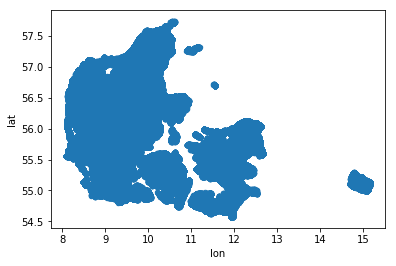

In [11]:
%matplotlib inline
df_data.plot.scatter(x = 'lon', y = 'lat')

#### 7. Use the following function, which computes the Haversine Distance (https://en.wikipedia.org/wiki/Haversine_formula) to compute an array of distances (distances) for each for each location in the dataset of Danish housing sales data to the city center of Roskilde (lat=55.65, lon=12.083333).

In [12]:
import math
def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
import matplotlib.pyplot as plt
#Roskilde (lat=55.65, lon=12.083333)

tqdm.pandas(desc="Creating haversine distance")

df_not_nan = df_data.dropna().copy()

list_df = df_not_nan.progress_apply(lambda y : haversine_distance(tuple([55.65,12.083333]), tuple([y['lat'], y['lon']])), axis=1)

Creating haversine distance: 100%|██████████| 1280975/1280975 [01:58<00:00, 10837.14it/s]


#### 8. Create another scatter plot as in the task above, but use the computed distances as color values, see keyword arguments c= and cmap= in the documentation of the scatter function plt.scatter?.

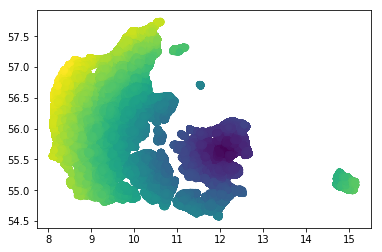

In [14]:
plt.scatter(x = df_not_nan.lon, y = df_not_nan.lat, c = list_df)